<a href="https://colab.research.google.com/github/rohitrrk22/Deep-Learning/blob/master/Deep_Learning_NLP/Multiclass%20Multilabel%20prediction%20For%20stack%20overflow%20Questions/Stackoverflow_Questions_Multiclass_Multilabel_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 %tensorflow_version 2.x

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

np.random.seed(1)

In [3]:
!wget https://www.dropbox.com/s/5721wcs2guuykzl/stacksample.zip

--2021-01-09 15:17:03--  https://www.dropbox.com/s/5721wcs2guuykzl/stacksample.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.18, 2620:100:6030:18::a27d:5012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/5721wcs2guuykzl/stacksample.zip [following]
--2021-01-09 15:17:04--  https://www.dropbox.com/s/raw/5721wcs2guuykzl/stacksample.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8f515de2a6fc7edc599532f7dc.dl.dropboxusercontent.com/cd/0/inline/BGq1yKEgh2Qd7Xbr80nBWuP2XieKIlHYmvFtcnisJZJO2HzHHgoNMqAxP6qI5w2zBybz0oSseSVNOgGIHBrxtcJZjOALcBwx6HXLSHZBJXRLXQ/file# [following]
--2021-01-09 15:17:04--  https://uc8f515de2a6fc7edc599532f7dc.dl.dropboxusercontent.com/cd/0/inline/BGq1yKEgh2Qd7Xbr80nBWuP2XieKIlHYmvFtcnisJZJO2HzHHgoNMqAxP6qI5w2zBybz0oSseSVNOgGIHBrxtcJZjOALcBwx6HXLSHZBJXRLXQ/file
Reso

In [4]:
!unzip stacksample.zip

Archive:  stacksample.zip
  inflating: Answers.csv             
  inflating: Questions.csv           
  inflating: Tags.csv                


In [5]:
!rm stacksample.zip

In [6]:
questions = pd.read_csv(r'/content/Questions.csv',encoding='ISO-8859-1')
tags = pd.read_csv(r'/content/Tags.csv',encoding='utf-8')

In [7]:
questions.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [8]:
tags.head()

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


In [9]:
grouped_tags = tags.groupby("Tag", sort="count").size().reset_index(name = 'count_number')

In [10]:
grouped_tags

,Tag,count_number
0,.a,13
1,.app,14
2,.aspxauth,6
3,.bash-profile,46
4,.class-file,19
...,...,...
37029,zwoptex,3
37030,zxing,159
37031,zxspectrum,1
37032,zynq,11


In [11]:
num_classes = 10
grouped_tags_1 = tags.groupby("Tag").size().reset_index(name='count_number')
top_10 = grouped_tags_1.nlargest(num_classes, columns='count_number')

In [12]:
top_10

,Tag,count_number
16121,javascript,124155
16020,java,115212
4301,c#,101186
24211,php,98808
979,android,90659
16611,jquery,78542
25712,python,64601
14180,html,58976
4311,c++,47591
15565,ios,47009


In [13]:
# Plotting Libs
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# magic function
%matplotlib inline

import collections

def plot_tags(tagCount):
    
    x,y = zip(*tagCount)

    colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
    colors = [colormap(i) for i in np.linspace(0, 0.8,50)]   

    area = [i/4000 for i in list(y)]   # 0 to 15 point radiuses
    plt.figure(figsize=(9,8))
    plt.ylabel("Number of question associations")
    for i in range(len(y)):
        plt.plot(i,y[i], marker='o', linestyle='',ms=area[i],label=x[i])

    plt.legend(numpoints=1)
    plt.show()

[('javascript', 124155), ('java', 115212), ('c#', 101186), ('php', 98808), ('android', 90659), ('jquery', 78542), ('python', 64601), ('html', 58976), ('c++', 47591), ('ios', 47009)]


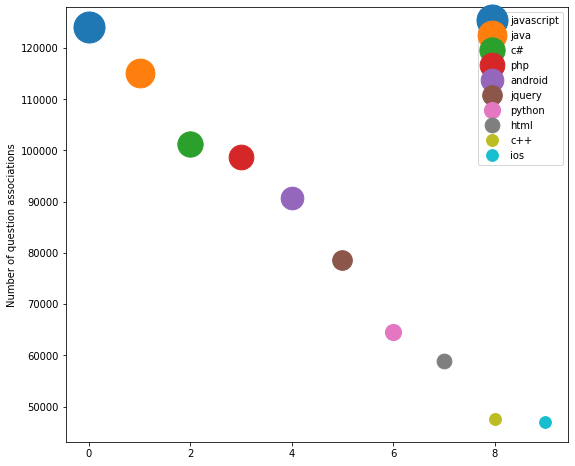

In [14]:
tagCount =  collections.Counter(list(tags['Tag'])).most_common(10)
print(tagCount)
plot_tags(tagCount)

In [15]:
# Filtering the top 10 tags data

tags.Tag = tags.Tag.apply(lambda tag : tag if tag in top_10.Tag.values else None)

In [16]:
tags.head()

,Id,Tag
0,80,None
1,80,None
2,80,None
3,90,None
4,90,None


In [17]:
tags.dropna(inplace=True)

In [18]:
tags.head()

,Id,Tag
14,260,c#
18,330,c++
28,650,c#
35,930,c#
39,1010,c#


In [19]:
questions.drop(columns=['OwnerUserId', 'CreationDate', 'ClosedDate','Score'], inplace=True)

In [20]:
questions.head()

,Id,Title,Body
0,80,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [21]:
tags.sort_values('Id')

,Id,Tag
14,260,c#
18,330,c++
28,650,c#
35,930,c#
39,1010,c#
...,...,...
3750974,40143150,javascript
3750981,40143190,python
3750984,40143210,php
3750987,40143340,android


In [22]:
tag_ids = list(tags['Id'])

In [23]:
question_top_10 = questions[questions['Id'].isin(tag_ids)]

In [24]:
question_top_10.head()

,Id,Title,Body
4,260,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...
5,330,Should I use nested classes in this case?,<p>I am working on a collection of classes use...
8,650,Automatically update version number,<p>I would like the version property of my app...
10,930,How do I connect to a database and loop over a...,<p>What's the simplest way to connect and quer...
11,1010,"How to get the value of built, encoded ViewState?",<p>I need to grab the base64-encoded represent...


In [25]:
questions_data_top_10 = question_top_10.merge(tags)

In [26]:
questions_data_top_10.head()

,Id,Title,Body,Tag
0,260,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,c#
1,330,Should I use nested classes in this case?,<p>I am working on a collection of classes use...,c++
2,650,Automatically update version number,<p>I would like the version property of my app...,c#
3,930,How do I connect to a database and loop over a...,<p>What's the simplest way to connect and quer...,c#
4,1010,"How to get the value of built, encoded ViewState?",<p>I need to grab the base64-encoded represent...,c#


In [27]:
import re 

def rem_html_tags(body):
    regex = re.compile('<.*?>')
    return re.sub(regex, '', body)

In [28]:
questions_data_top_10['Body'] = questions_data_top_10['Body'].apply(rem_html_tags)
questions_data_top_10.head()

,Id,Title,Body,Tag
0,260,Adding scripting functionality to .NET applica...,I have a little game written in C#. It uses a ...,c#
1,330,Should I use nested classes in this case?,I am working on a collection of classes used f...,c++
2,650,Automatically update version number,I would like the version property of my applic...,c#
3,930,How do I connect to a database and loop over a...,What's the simplest way to connect and query a...,c#
4,1010,"How to get the value of built, encoded ViewState?",I need to grab the base64-encoded representati...,c#


In [29]:
questions_data_top_10['Body'].iloc[3]

"What's the simplest way to connect and query a database for a set of records in C#?\n"

In [30]:
questions_data_top_10['Text'] = questions_data_top_10['Title'] +' '+ questions_data_top_10['Body']

In [31]:
questions_data_top_10.head()

,Id,Title,Body,Tag,Text
0,260,Adding scripting functionality to .NET applica...,I have a little game written in C#. It uses a ...,c#,Adding scripting functionality to .NET applica...
1,330,Should I use nested classes in this case?,I am working on a collection of classes used f...,c++,Should I use nested classes in this case? I am...
2,650,Automatically update version number,I would like the version property of my applic...,c#,Automatically update version number I would li...
3,930,How do I connect to a database and loop over a...,What's the simplest way to connect and query a...,c#,How do I connect to a database and loop over a...
4,1010,"How to get the value of built, encoded ViewState?",I need to grab the base64-encoded representati...,c#,"How to get the value of built, encoded ViewSta..."


In [32]:
questions_data_top_10.drop(columns=['Title','Body'], inplace=True)

In [33]:
questions_data_top_10.head()

,Id,Tag,Text
0,260,c#,Adding scripting functionality to .NET applica...
1,330,c++,Should I use nested classes in this case? I am...
2,650,c#,Automatically update version number I would li...
3,930,c#,How do I connect to a database and loop over a...
4,1010,c#,"How to get the value of built, encoded ViewSta..."


In [34]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import MultiLabelBinarizer

In [35]:
multiLableBinarizer = MultiLabelBinarizer()
multiLableBinarizer.fit([questions_data_top_10.Tag])

MultiLabelBinarizer(classes=None, sparse_output=False)

In [36]:
Labels = multiLableBinarizer.classes_
Labels

array(['android', 'c#', 'c++', 'html', 'ios', 'java', 'javascript',
       'jquery', 'php', 'python'], dtype=object)

In [37]:
sam = multiLableBinarizer.transform(questions_data_top_10.Tag)

In [38]:
sam

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [39]:
y = pd.get_dummies(questions_data_top_10.Tag).to_numpy()

In [40]:
maxlen = 180
max_words = 5000
tokenizer = Tokenizer(num_words=max_words, lower=True)
tokenizer.fit_on_texts(questions_data_top_10.Text)

In [41]:
def get_features(text_series):
    """
    transforms text data to feature_vectors that can be used in the ml model.
    tokenizer must be available.
    """
    sequences = tokenizer.texts_to_sequences(text_series)
    return pad_sequences(sequences, maxlen=maxlen)

def prediction_to_label(prediction):
    tag_prob = [(labels[i], prob) for i, prob in enumerate(prediction.tolist())]
    return dict(sorted(tag_prob, key=lambda kv: kv[1], reverse=True))

In [42]:
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import OneHotEncoder
#enc = OneHotEncoder(handle_unknown='ignore')

x = get_features(questions_data_top_10.Text)

In [43]:
x.shape

(826739, 180)

In [44]:
y.shape

(826739, 10)

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [46]:
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Embedding, Flatten, GlobalMaxPool1D, Dropout, Conv1D
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

filter_length = 300

model = Sequential()
model.add(Embedding(max_words, 200, input_length=maxlen))
model.add(Dropout(0.1))
model.add(Conv1D(filter_length, 3, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPool1D())
model.add(Dense(num_classes))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['categorical_accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 180, 200)          1000000   
_________________________________________________________________
dropout (Dropout)            (None, 180, 200)          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 178, 300)          180300    
_________________________________________________________________
global_max_pooling1d (Global (None, 300)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                3010      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 1,183,310
Trainable params: 1,183,310
Non-trainable params: 0
______________________________________________

In [48]:
history=model.fit(x_train,y_train,epochs=5,validation_split=0.2)

Epoch 1/5
16535/16535 [==============================] - 440s 27ms/step - loss: 0.1128 - categorical_accuracy: 0.7613 - val_loss: 0.1097 - val_categorical_accuracy: 0.7675
Epoch 2/5
16535/16535 [==============================] - 418s 25ms/step - loss: 0.1076 - categorical_accuracy: 0.7715 - val_loss: 0.1087 - val_categorical_accuracy: 0.7680
Epoch 3/5
16535/16535 [==============================] - 408s 25ms/step - loss: 0.1048 - categorical_accuracy: 0.7771 - val_loss: 0.1116 - val_categorical_accuracy: 0.7645
Epoch 4/5
16535/16535 [==============================] - 401s 24ms/step - loss: 0.1026 - categorical_accuracy: 0.7811 - val_loss: 0.1130 - val_categorical_accuracy: 0.7629
Epoch 5/5
16535/16535 [==============================] - 408s 25ms/step - loss: 0.1007 - categorical_accuracy: 0.7855 - val_loss: 0.1120 - val_categorical_accuracy: 0.7629


In [49]:
y_pred = model.predict_classes(x_test)

In [50]:
y_pred

array([3, 0, 1, ..., 9, 9, 0])

In [51]:
model.evaluate(x_test,y_test)

5168/5168 [==============================] - 32s 6ms/step - loss: 0.1120 - categorical_accuracy: 0.7631


[0.11195224523544312, 0.763117790222168]

In [52]:
import matplotlib.pyplot as plt

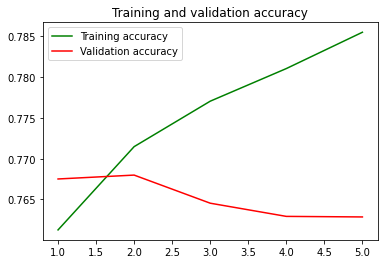

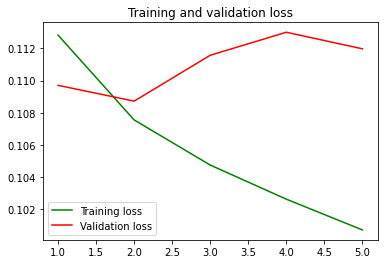

In [53]:
# Plot results
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [54]:
y_pred = model.predict(x_test)

In [55]:
y_pred [y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0

In [56]:
y_pred

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [57]:
from  sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,y_pred)

In [58]:
auc

0.8536280193965735

In [59]:
pred = pd.DataFrame(y_pred)

In [60]:
pred.shape

(165348, 10)

In [61]:
pred

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
165343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
165345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
165346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [62]:
Labels = list(Labels)

In [63]:
Labels

['android',
 'c#',
 'c++',
 'html',
 'ios',
 'java',
 'javascript',
 'jquery',
 'php',
 'python']

In [64]:
from  sklearn.metrics import confusion_matrix,classification_report

In [65]:
y_test

array([[0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [66]:
y_true = np.argmax(y_test, axis=1)

In [67]:
y_true = pd.DataFrame(y_true)

In [68]:
y_true.head()

,0
0,7
1,0
2,1
3,1
4,6


In [69]:
y_predicted = pd.DataFrame(np.argmax(y_pred,axis=1))

In [70]:
y_predicted.head()

,0
0,3
1,0
2,1
3,1
4,0


In [71]:
report = classification_report(y_true,y_predicted, target_names=Labels)

In [72]:
print(report)

              precision    recall  f1-score   support

     android       0.41      0.95      0.58     17828
          c#       0.86      0.86      0.86     20289
         c++       0.91      0.79      0.85      9492
        html       0.62      0.33      0.43     11678
         ios       0.96      0.84      0.90      9379
        java       0.92      0.74      0.82     23343
  javascript       0.68      0.53      0.60     25102
      jquery       0.55      0.46      0.50     15644
         php       0.84      0.79      0.81     19660
      python       0.95      0.88      0.91     12933

    accuracy                           0.72    165348
   macro avg       0.77      0.72      0.73    165348
weighted avg       0.76      0.72      0.72    165348



In [73]:
conf_matrix = confusion_matrix(y_true,y_predicted)

In [74]:
confusion_df = pd.DataFrame(conf_matrix)
confusion_df

,0,1,2,3,4,5,6,7,8,9
0,16907,106,34,17,58,488,120,15,61,22
1,1774,17493,247,60,43,171,209,138,115,39
2,859,745,7526,3,42,134,26,0,38,119
3,2729,272,13,3872,39,147,2009,1424,1033,140
4,1114,115,76,30,7896,13,84,11,30,10
5,4941,529,182,54,18,17197,174,41,101,106
6,5258,542,20,1152,70,200,13319,3634,817,90
7,3792,283,1,753,7,54,2937,7157,634,26
8,2465,151,35,300,33,91,520,539,15473,53
9,901,120,167,32,12,99,98,9,96,11399


In [75]:
Labels

['android',
 'c#',
 'c++',
 'html',
 'ios',
 'java',
 'javascript',
 'jquery',
 'php',
 'python']

In [76]:
# Creating a dictionary of labels
labels_dict = {
    0: 'android',
    1: 'c#',
    2: 'c++',
    3: 'html',
    4: 'ios',
    5: 'java',
    6: 'javascript',
    7: 'jquery',
    8: 'php',
    9: 'python'
}

In [77]:
# Renaming rows and columns with labes
confusion_df = confusion_df.rename(columns=labels_dict)
confusion_df.index = confusion_df.columns
confusion_df

,android,c#,c++,html,ios,java,javascript,jquery,php,python
android,16907,106,34,17,58,488,120,15,61,22
c#,1774,17493,247,60,43,171,209,138,115,39
c++,859,745,7526,3,42,134,26,0,38,119
html,2729,272,13,3872,39,147,2009,1424,1033,140
ios,1114,115,76,30,7896,13,84,11,30,10
java,4941,529,182,54,18,17197,174,41,101,106
javascript,5258,542,20,1152,70,200,13319,3634,817,90
jquery,3792,283,1,753,7,54,2937,7157,634,26
php,2465,151,35,300,33,91,520,539,15473,53
python,901,120,167,32,12,99,98,9,96,11399


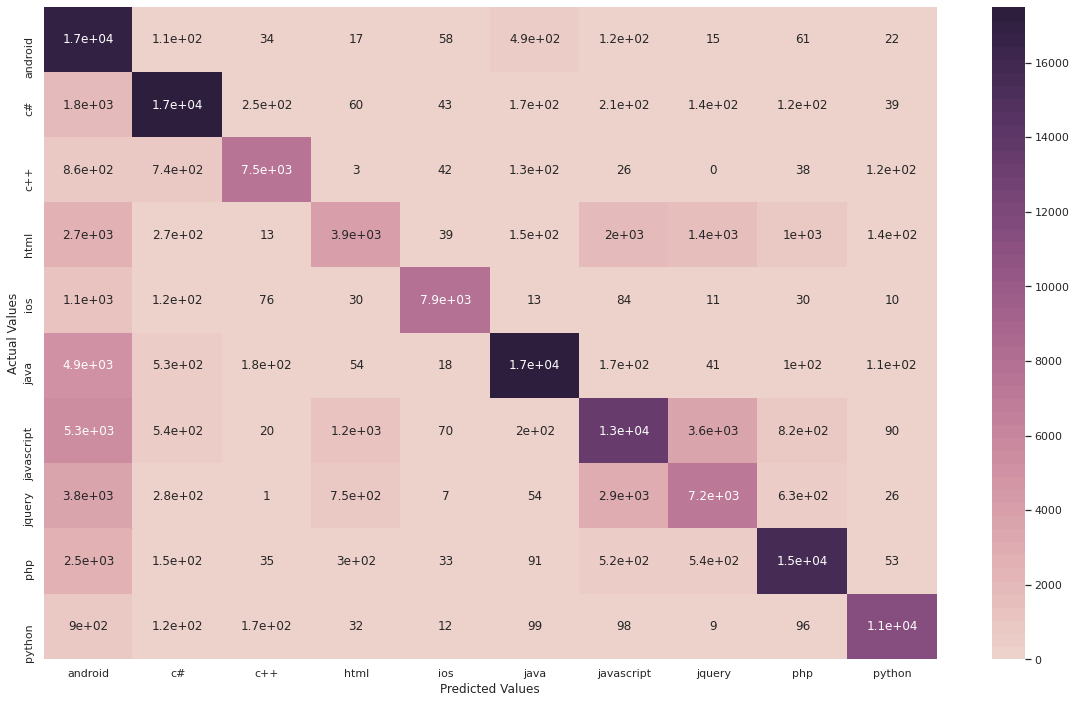

In [78]:
import seaborn as sns

# Creating a heatmap for the confusion matrix for display
plt.figure(figsize= (20,12))
sns.set(font_scale = 1);
ax = sns.heatmap(confusion_df, annot=True, cmap=sns.cubehelix_palette(50));
ax.set(xlabel='Predicted Values', ylabel='Actual Values');